# Student Performance Predictions

[meizmyang](https://github.com/meizmyang)

## Import modules

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')

## Data preparation

In [40]:
df = pd.concat([mat, por])

In [41]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [42]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [43]:
df.G3 = df.G3.astype(int)

In [44]:
df.G3

0       6
1       6
2      10
3      15
4      10
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 1044, dtype: int32

In [45]:
df['final_grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'final_grade'] = 'good'
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'final_grade'] = 'fair'
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'final_grade'] = 'poor'

In [46]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [47]:
df.isnull().any()

school         False
sex            False
age            False
address        False
famsize        False
Pstatus        False
Medu           False
Fedu           False
Mjob           False
Fjob           False
reason         False
guardian       False
traveltime     False
studytime      False
failures       False
schoolsup      False
famsup         False
paid           False
activities     False
nursery        False
higher         False
internet       False
romantic       False
famrel         False
freetime       False
goout          False
Dalc           False
Walc           False
health         False
absences       False
G1             False
G2             False
G3             False
final_grade    False
dtype: bool

There are no null values :)

## EDA

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

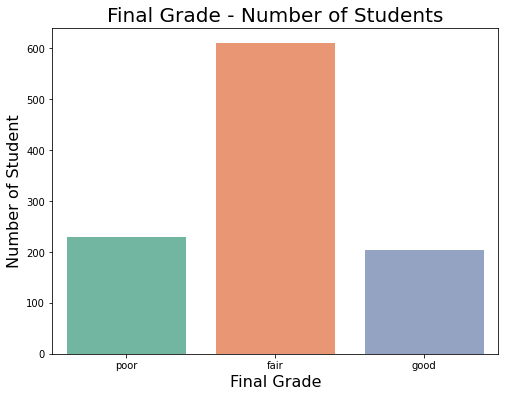

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=['poor', 'fair', 'good'], palette='Set2')
plt.title("Final Grade - Number of Students", fontsize=20)
plt.xlabel("Final Grade", fontsize=16)
plt.ylabel("Number of Student", fontsize=16)

### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

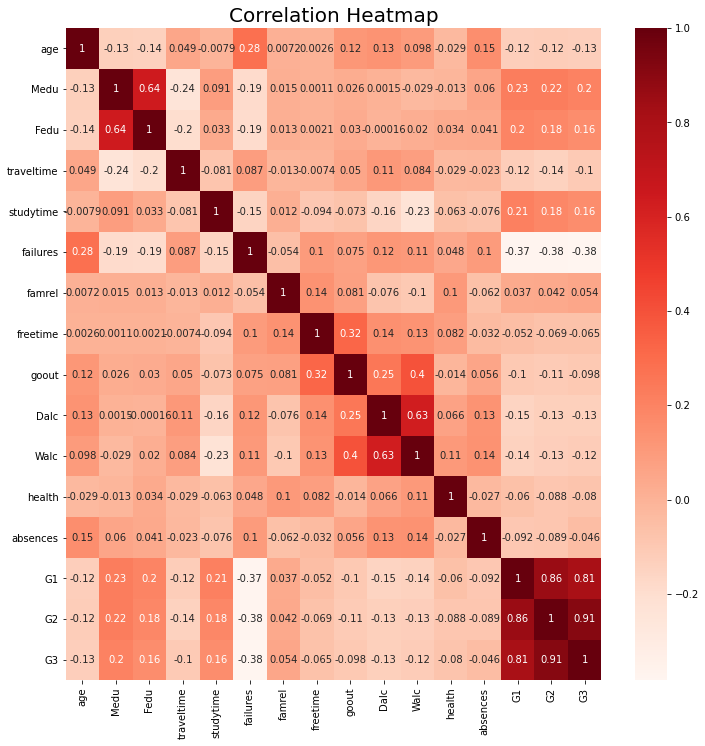

In [50]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title("Correlation Heatmap", fontsize=20)

## Romantic Relationship

In [51]:
perc = (lambda col: col/col.sum())
index = ['poor', 'fair', 'good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

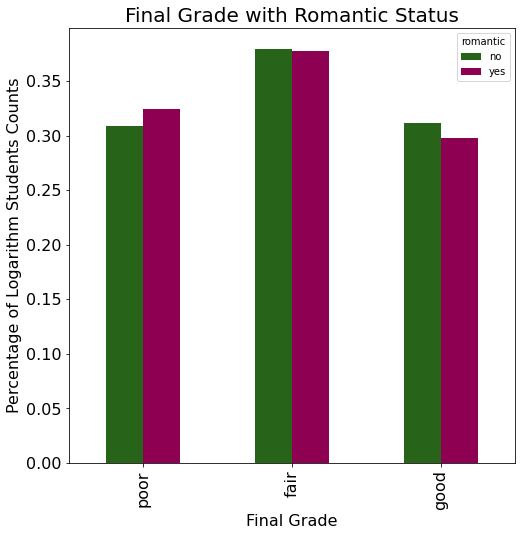

In [52]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title("Final Grade with Romantic Status", fontsize=20)
plt.ylabel("Percentage of Logarithm Students Counts", fontsize=16)
plt.xlabel("Final Grade", fontsize=16)
plt.show()

In [53]:
import statsmodels.api as sm 
romance_table = sm.stats.Table(romance_tab1)
romance_result = romance_table.test_nominal_association()
romance_result.pvalue

0.038810128743959726

## Alcoholic Consumptions

In [55]:
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.Walc)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

In [56]:
# Good Students
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage'] = good.Walc

# Poor Students
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage'] = poor.Walc

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


No handles with labels found to put in legend.


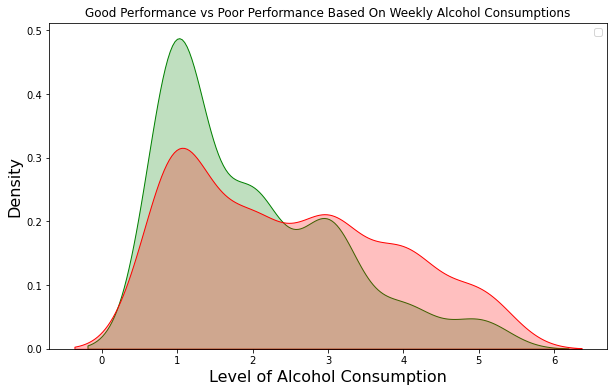

In [58]:
plt.figure(figsize=(10, 6))
p1 = sns.kdeplot(good['good_alcohol_usage'], shade=True, color='g')
p1 = sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color='r')
plt.title("Good Performance vs Poor Performance Based On Weekly Alcohol Consumptions")
plt.ylabel("Density", fontsize=16)
plt.xlabel("Level of Alcohol Consumption", fontsize=16)

Text(0.5, 0, 'Final Grade')

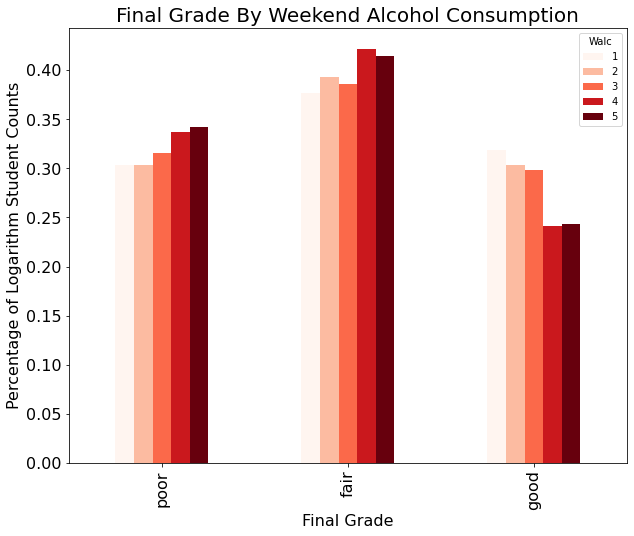

In [59]:
alc_perc.plot.bar(colormap='Reds', figsize=(10, 8), fontsize=16)
plt.title("Final Grade By Weekend Alcohol Consumption", fontsize=20)
plt.ylabel("Percentage of Logarithm Student Counts", fontsize=16)
plt.xlabel("Final Grade", fontsize=16)

In [60]:
alc_table = sm.stats.Table(alc_tab1)
alc_result = alc_table.test_nominal_association()
alc_result.pvalue

0.007592294056368298

Please follow the full version here

[link](https://github.com/meizmyang/Student-Performance-Classification-Analysis/blob/master/Student%20Performance%20Analysis%20and%20Classification.ipynb)